In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os
import re

In [2]:
file="Reviews.csv"
data= pd.read_csv(file)
print(data.shape)

(334119, 31)


In [3]:
data.describe()

,Unnamed: 0,ï»¿,ratings_overall,labels,likeCount,latitude,longitude,primary_cuisine_id,review_number,restaurant_overall_rating
count,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000
mean,167059.000000,168411.559947,2.817562,1.916958,0.241884,23.668077,90.623229,127.527136,4014.909981,3.841418
std,96451.991633,96817.799309,1.684886,0.935649,0.629411,0.528833,0.528335,54.243513,5812.797803,0.445709
min,0.000000,0.000000,1.000000,1.000000,-2.000000,22.269991,90.210323,0.000000,0.000000,0.000000
25%,83529.500000,84763.500000,1.000000,1.000000,0.000000,23.741879,90.371986,85.000000,488.000000,3.600000
50%,167059.000000,168499.000000,3.000000,2.000000,0.000000,23.773776,90.405709,86.000000,1584.000000,3.900000
75%,250588.500000,252235.500000,5.000000,3.000000,0.000000,23.810406,90.425728,193.000000,4697.000000,4.100000
max,334118.000000,335947.000000,5.000000,3.000000,51.000000,24.919806,91.910593,249.000000,32993.000000,5.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334119 entries, 0 to 334118
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 334119 non-null  int64  
 1   ï»¿                        334119 non-null  int64  
 2   uuid                       334119 non-null  object 
 3   createdAt                  334119 non-null  object 
 4   updatedAt                  334119 non-null  object 
 5   text                       334119 non-null  object 
 6   isAnonymous                334119 non-null  bool   
 7   reviewerName               334119 non-null  object 
 8   reviewerId                 334119 non-null  object 
 9   ratings_overall            334119 non-null  int64  
 10  labels                     334119 non-null  int64  
 11  ratings                    334119 non-null  object 
 12  type                       334119 non-null  object 
 13  likeCount                  33

In [5]:
data.isnull().sum()

Unnamed: 0                   0
ï»¿                          0
uuid                         0
createdAt                    0
updatedAt                    0
text                         0
isAnonymous                  0
reviewerName                 0
reviewerId                   0
ratings_overall              0
labels                       0
ratings                      0
type                         0
likeCount                    0
isLiked                      0
code                         0
name                         0
address                      0
city                         0
post_code                    0
latitude                     0
longitude                    0
primary_cuisine              0
primary_cuisine_id           0
cuisines                     0
review_number                0
restaurant_overall_rating    0
hero_image                   0
hero_listing_image           0
vertical_type_ids            0
web_path                     0
dtype: int64

In [6]:
data.text.infer_objects()

0                                     too much small amount
1                                      very small in amount
2         food average but their desert booter halwa and...
3                                           fresh and tasty
4                             everything i ordered was good
                                ...                        
334114    food was good as usual but the behavior of the...
334115                                            the worst
334116                                            very nice
334117                                                 good
334118    fcking scammers dont order from here bun er up...
Name: text, Length: 334119, dtype: object

In [7]:
data.head()

,Unnamed: 0,ï»¿,uuid,createdAt,updatedAt,text,isAnonymous,reviewerName,reviewerId,ratings_overall,...,longitude,primary_cuisine,primary_cuisine_id,cuisines,review_number,restaurant_overall_rating,hero_image,hero_listing_image,vertical_type_ids,web_path
0,0,0,68e8f769-a0f0-460c-bfb9-16662fcc1e17,2023-11-02T06:48:08Z,2023-11-02T06:48:08Z,too much small amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
1,1,1,706a1e43-7475-4d7f-8488-cb8ed2ea8991,2023-10-27T07:35:53Z,2023-10-27T07:35:53Z,very small in amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
2,2,2,16cd99a3-7295-432e-b193-1551df62d255,2023-10-25T18:09:17Z,2023-10-25T18:09:17Z,food average but their desert booter halwa and...,False,SALMAN,bdjrt0zq,3,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
3,3,3,61a9fdf3-ad6b-4d23-9436-1f2f596bbcff,2023-10-25T07:48:39Z,2023-10-25T07:48:39Z,fresh and tasty,False,GOLAM,b6hrp8of,5,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
4,4,4,a7835cdf-2c1f-4cf0-b9d5-2777d904d746,2023-10-15T13:37:20Z,2023-10-15T13:37:20Z,everything i ordered was good,False,FERZANA,bddrkjrd,4,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...


In [8]:
data.loc[1:15, ['text','reviewerName', 'ratings_overall','labels']]

,text,reviewerName,ratings_overall,labels
1,very small in amount,MOON,2,1
2,food average but their desert booter halwa and...,SALMAN,3,2
3,fresh and tasty,GOLAM,5,3
4,everything i ordered was good,FERZANA,4,3
5,kalo jira vhorta balu vhorta not recommended b...,FERZANA,1,1
6,quantity of dal should be little more otherwis...,FERZANA,4,3
7,beef was too poor in size quantity aganist pri...,DEDAR,3,2
8,chicken was not up to the mark and lotpoti was...,IFTEKHER,5,3
9,lot of sand in kali jeers bortha,MOHAMMAD,4,3
10,bad,MOHAMMAD,1,1


In [9]:
print(len(max(data['text'],key=len)))
print(len(min(data['text'],key=len)))
average_text_length = data['text'].apply(len).mean()
print("Average Text Length:", average_text_length)

366
3
Average Text Length: 57.930898871360206


In [10]:
top_10_max_length_indices = data['text'].apply(len).nlargest(10).index
top_10_max_length_texts = data.loc[top_10_max_length_indices, 'text']

In [11]:
for idx, text in top_10_max_length_texts.items():
    print(f"Text {idx} - Length: {len(text)}\n{text}\n")

Text 80183 - Length: 366
skip if anyone wants to eat in a word disgusting a piece of hard meat tasteless small cloves garlic cloves will be given in chuijhal there is no taste it is floating in oil rice is also that thick low in salt most cold stale food offers online it was good to be back almond sherbet is the worst i vomited after eating i have never eaten such bad almond syrup before 

Text 104613 - Length: 347
very bad experience except for rice most of their food is from the fridge today i ordered potato eggplant bharta dal and rice potatoes for potato filling are not boiled the smell of eggplant filling and salt was not given to either of the o clock the branch also smells and the amount of all food is very less will tell everyone not to order here 

Text 117542 - Length: 306
their bengali items are good mashaallah but the fast food items are very bad money is wasted just giving a basket of meat does not make a burger sandwich burgers and sharmas offer roughly the same ingredien

In [12]:
top_10_min_length_indices = data['text'].apply(len).nsmallest(10).index
top_10_min_length_texts = data.loc[top_10_min_length_indices, 'text']

In [13]:
for idx, text in top_10_min_length_texts.items():
    print(f"Text {idx} - Length: {len(text)}\n{text}\n")

Text 10 - Length: 3
bad

Text 1138 - Length: 3
bad

Text 1905 - Length: 3
fun

Text 2078 - Length: 3
god

Text 2431 - Length: 3
bad

Text 2504 - Length: 3
bad

Text 3055 - Length: 3
bad

Text 3077 - Length: 3
pet

Text 3161 - Length: 3
yes

Text 3272 - Length: 3
bad



In [14]:
data.labels.value_counts()

labels
1    161275
3    133529
2     39315
Name: count, dtype: int64

In [15]:
data.ratings_overall.value_counts()

ratings_overall
1    127409
5     94199
4     39330
3     39315
2     33866
Name: count, dtype: int64

In [16]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.io as pio

init_notebook_mode(True)

fig = px.bar(x=data.labels.value_counts().index,y=data.labels.value_counts(),color=data.labels.value_counts().index,text=data.labels.value_counts())
fig.update_traces(hovertemplate="Category:'%{x}' Counted: %{y}")
fig.update_layout(title={"text":"Category Counts","x":0.5,"font":{"size":35}},xaxis={"title":"Category","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white",width=800,height=500,showlegend=False)
iplot(fig)

In [17]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.io as pio

init_notebook_mode(True)

fig = px.bar(x=data.ratings_overall.value_counts().index,y=data.ratings_overall.value_counts(),color=data.ratings_overall.value_counts().index,text=data.ratings_overall.value_counts())
fig.update_traces(hovertemplate="Category:'%{x}' Counted: %{y}")
fig.update_layout(title={"text":"Category Counts","x":0.5,"font":{"size":35}},xaxis={"title":"Category","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white",width=800,height=500,showlegend=False)
iplot(fig)

Text(0.5, 1.0, 'Distribution of sentiments')

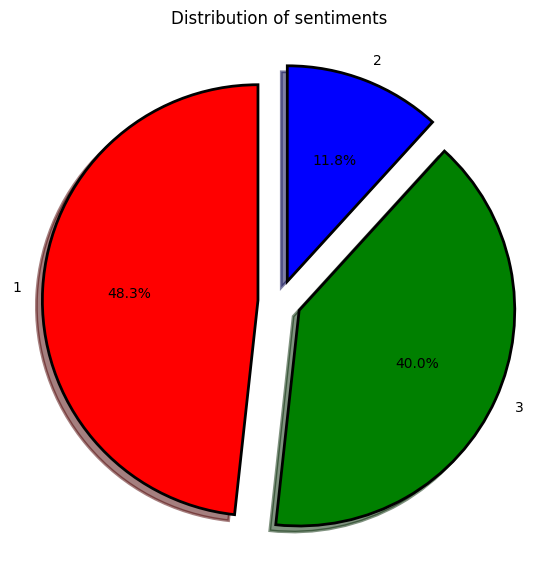

In [18]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':2, "edgecolor":'black'}
tags = data['labels'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")

Text(0.5, 1.0, 'Distribution of ratings')

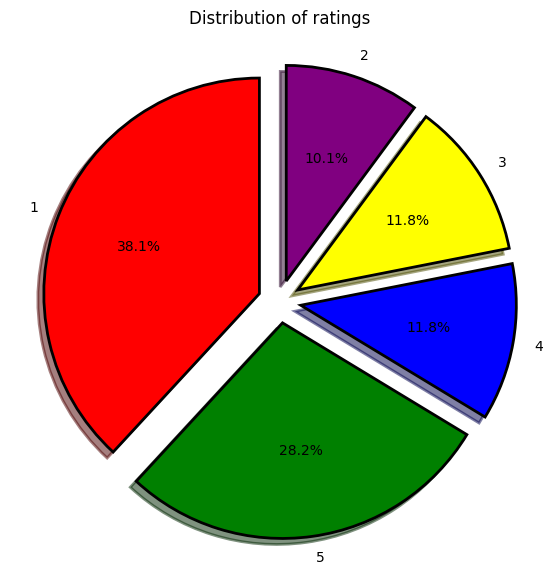

In [19]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','yellow','purple')
wp = {'linewidth':2, "edgecolor":'black'}
tags = data['ratings_overall'].value_counts()
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of ratings")

#here 1 bad, 2 neutral & 3 good

In [20]:
from collections import Counter
wordList = list()
for i in range(len(data)):
    temp = data.text[i].split()
    for k in temp:
        k = re.sub("[^a-zA-Z]","",k)
        if k != "":
            wordList.append(k)
wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
print("REAL Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))

REAL Most Used 20 Words
the : 155351
was : 136113
good : 89312
and : 75565
food : 72332
i : 62400
it : 56166
is : 56079
not : 55565
but : 50065
of : 49486
very : 49480
chicken : 42144
to : 36466
a : 34332
bad : 30647
taste : 30600
they : 30374
in : 29714
t : 25007


In [21]:
num = 75 # For using most used 75 words
list1 = list()
list2 = list()
for i in range(num):
    list1.append(wordCount.most_common(num)[i][0])
    list2.append(wordCount.most_common(num)[i][1])

In [22]:
fig2 = px.bar(x=list1,y=list2,color=list2,hover_name=list1,hover_data={'Word':list1,"Count":list2})
fig2.update_traces(hovertemplate="Word:'%{x}' Value: %{y}")
fig2.update_layout(title={"text":"Word Values","x":0.5,"font":{"size":30}},xaxis={"title":"Words","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white")
fig2.show()

Text(0, 0.5, 'Frequency')

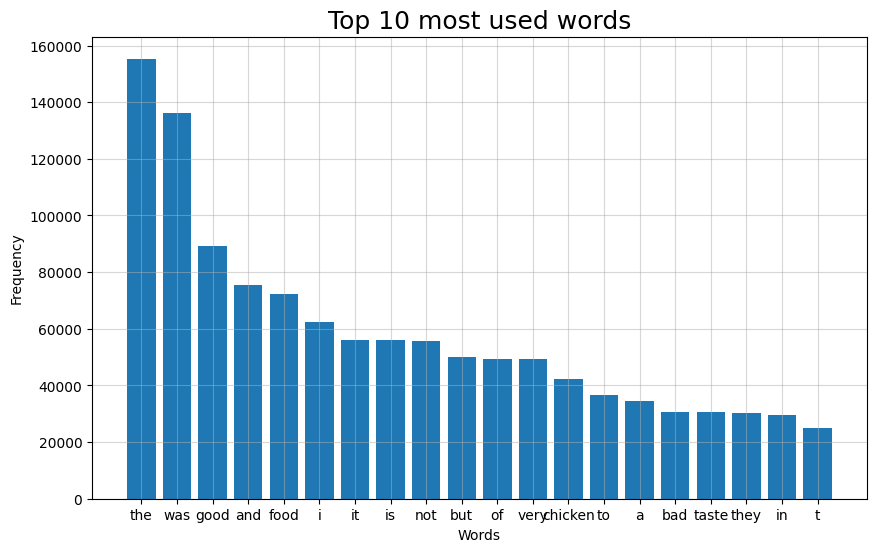

In [23]:
import collections
words = []
for text in data['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(20))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title
plt.title('Top 10 most used words', fontsize = 18)

# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

In [24]:
min_text_length = 3

# Filter rows with text length greater than or equal to 3
filtered_df = data[data['text'].apply(lambda x: len(x) >= min_text_length)]

# Display the modified DataFrame
filtered_df

,Unnamed: 0,ï»¿,uuid,createdAt,updatedAt,text,isAnonymous,reviewerName,reviewerId,ratings_overall,...,longitude,primary_cuisine,primary_cuisine_id,cuisines,review_number,restaurant_overall_rating,hero_image,hero_listing_image,vertical_type_ids,web_path
0,0,0,68e8f769-a0f0-460c-bfb9-16662fcc1e17,2023-11-02T06:48:08Z,2023-11-02T06:48:08Z,too much small amount,False,MOON,bdaclwhn,2,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
1,1,1,706a1e43-7475-4d7f-8488-cb8ed2ea8991,2023-10-27T07:35:53Z,2023-10-27T07:35:53Z,very small in amount,False,MOON,bdaclwhn,2,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
2,2,2,16cd99a3-7295-432e-b193-1551df62d255,2023-10-25T18:09:17Z,2023-10-25T18:09:17Z,food average but their desert booter halwa and...,False,SALMAN,bdjrt0zq,3,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
3,3,3,61a9fdf3-ad6b-4d23-9436-1f2f596bbcff,2023-10-25T07:48:39Z,2023-10-25T07:48:39Z,fresh and tasty,False,GOLAM,b6hrp8of,5,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
4,4,4,a7835cdf-2c1f-4cf0-b9d5-2777d904d746,2023-10-15T13:37:20Z,2023-10-15T13:37:20Z,everything i ordered was good,False,FERZANA,bddrkjrd,4,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334114,334114,335943,134b7bdd-75fa-45bb-8804-95d921430a6e,2023-01-05T07:08:08Z,2023-01-05T07:08:08Z,food was good as usual but the behavior of the...,False,SOUDAMINEE,bd9ozccz,3,...,90.386578,Italian,86,"['Italian', 'Beverage', 'Mediterranean', 'Pizz...",101,2.9,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/zyx2/janna...
334115,334115,335944,81869547-e7a9-4c39-a092-1cddd4f5afd7,2022-12-23T14:20:56Z,2022-12-23T14:20:56Z,the worst,False,TASNIM,bdmmx1ub,1,...,90.386578,Italian,86,"['Italian', 'Beverage', 'Mediterranean', 'Pizz...",101,2.9,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/zyx2/janna...
334116,334116,335945,0a825486-fcd1-4b0a-9120-9e13bf66f5ba,2022-12-22T06:20:54Z,2022-12-22T06:20:54Z,very nice,False,AKLIMA,bd7uzuk7,5,...,90.386578,Italian,86,"['Italian', 'Beverage', 'Mediterranean', 'Pizz...",101,2.9,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/zyx2/janna...
334117,334117,335946,391514ca-fafa-4159-b92c-83022d714338,2022-12-13T14:48:51Z,2022-12-13T14:48:51Z,good,False,SOUDAMINEE,bd9ozccz,4,...,90.386578,Italian,86,"['Italian', 'Beverage', 'Mediterranean', 'Pizz...",101,2.9,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/zyx2/janna...


In [31]:
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


def leadMyWord(text):
    text = text.lower()
    
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don t", "do not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"didn t", "did not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"won t", "will not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"isn t", "is not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"aren t", "are not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"wasn t", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"weren t", "were not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"haven t", "have not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hadn t", "had not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"couldn t", "could not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"shouldn t", "should not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"can t", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"it s", "it is", text)
    text = re.sub(r"kebab", "kabab", text)
    text = re.sub(r"nun", "naan", text)
    text = re.sub(r"nan", "naan", text)
    text = re.sub('[^a-zA-Z]'," ",text)
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text= re.sub('\s{2,}', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
#     print(text)
    text = "".join(text)
#     text = [word for word in text.split() if word not in stopword]
# #     print(text,"f2nd")
#     text = " ".join(text)
#     print(text,"last")
    return text   
textList = data.text.apply(leadMyWord)
print("Before")
print(data["text"][2])
data['text'] = data.text.apply(leadMyWord)
# data['clean_data']=textList
textList = list(textList)

print("After")
print(textList[2])
print("Time Passed")


Before
food average but their desert booter halwa and pudding is very good
After
food average but their desert booter halwa and pudding is very good
Time Passed


In [30]:
unique_words = set(textList)

# Count the number of unique words
total_unique_words = len(unique_words)

print("Total unique words:", total_unique_words)

Total unique words: 261451


In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(textList)

In [33]:
import itertools

word_count = tokenizer.word_counts # count of all words in corpus
dict(itertools.islice(dict(word_count).items(), 50))

{'too': 22028,
 'much': 12485,
 'small': 9052,
 'amount': 8685,
 'very': 49480,
 'in': 29714,
 'food': 72332,
 'average': 6913,
 'but': 50065,
 'their': 9657,
 'desert': 55,
 'booter': 113,
 'halwa': 156,
 'and': 75565,
 'pudding': 324,
 'is': 62786,
 'good': 89312,
 'fresh': 6378,
 'tasty': 9177,
 'everything': 2808,
 'i': 62400,
 'ordered': 23740,
 'was': 139706,
 'kalo': 141,
 'jira': 22,
 'vhorta': 74,
 'balu': 36,
 'not': 79044,
 'recommended': 2941,
 'baki': 321,
 'shob': 635,
 'valo': 7761,
 'chilo': 13538,
 'quantity': 20002,
 'of': 49486,
 'dal': 2370,
 'should': 7600,
 'be': 12301,
 'little': 5803,
 'more': 8512,
 'otherwise': 1313,
 'specially': 268,
 'beef': 10936,
 'poor': 10046,
 'size': 6930,
 'aganist': 1,
 'price': 14758,
 'test': 6766,
 'chicken': 42144,
 'up': 4697}

In [34]:
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

# Take the top 50 words
top_50_words = dict(itertools.islice(sorted_word_count, 50))

# Display the top 50 words in a list
top_50_list = list(top_50_words.keys())
print(top_50_list)

['the', 'was', 'good', 'not', 'and', 'food', 'is', 'i', 'it', 'but', 'of', 'very', 'chicken', 'to', 'a', 'bad', 'taste', 'they', 'in', 'order', 'ordered', 'quality', 'so', 'too', 'quantity', 'for', 'with', 'rice', 'this', 'burger', 'were', 'price', 'did', 'meat', 'pizza', 'no', 'as', 'chilo', 'my', 'that', 'you', 'have', 'like', 'much', 'from', 'be', 'all', 'time', 'ta', 'worst']


In [38]:
top_50_words = dict(itertools.islice(sorted_word_count, 200))

# Display the top 50 words and their occurrences
for word, count in top_50_words.items():
    print(f'{word}: {count}')

the: 155338
was: 139706
good: 89312
not: 79044
and: 75565
food: 72332
is: 62786
i: 62400
it: 56166
but: 50065
of: 49486
very: 49480
chicken: 42144
to: 36464
a: 34332
bad: 30647
taste: 30584
they: 30341
in: 29714
order: 24556
ordered: 23740
quality: 22825
so: 22321
too: 22028
quantity: 20002
for: 19059
with: 17587
rice: 17183
this: 16515
burger: 15374
were: 14975
price: 14758
did: 14708
meat: 14497
pizza: 13997
no: 13550
as: 13549
chilo: 13538
my: 13161
that: 13149
you: 13009
have: 12873
like: 12856
much: 12485
from: 12458
be: 12301
all: 12040
time: 11376
ta: 11332
worst: 11054
beef: 10936
one: 10839
best: 10811
less: 10682
are: 10561
there: 10505
me: 10049
poor: 10046
sauce: 9977
delivery: 9926
at: 9695
their: 9657
cold: 9617
tasty: 9177
really: 9171
small: 9052
had: 8925
do: 8890
money: 8723
amount: 8685
just: 8559
also: 8525
more: 8512
delicious: 8107
na: 8006
fried: 7772
valo: 7761
er: 7707
should: 7600
gave: 7534
give: 7426
better: 7403
always: 7290
great: 6954
size: 6930
average: 

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
documents = [
    "too much small amount.",
    "very small in amount",
    " fresh and tasty.",
    "everything i ordered was good",
]

In [6]:
# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)


In [7]:
# Get feature names (words) and document names
feature_names = tfidf_vectorizer.get_feature_names_out()
document_names = [f"Document {i+1}" for i in range(len(documents))]

# Create a DataFrame for better visualization
import pandas as pd
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names, index=document_names)

# Print the DataFrame
print(tfidf_df)


              amount      and  everything    fresh  good        in      much  \
Document 1  0.437791  0.00000         0.0  0.00000   0.0  0.000000  0.555283   
Document 2  0.437791  0.00000         0.0  0.00000   0.0  0.555283  0.000000   
Document 3  0.000000  0.57735         0.0  0.57735   0.0  0.000000  0.000000   
Document 4  0.000000  0.00000         0.5  0.00000   0.5  0.000000  0.000000   

            ordered     small    tasty       too      very  was  
Document 1      0.0  0.437791  0.00000  0.555283  0.000000  0.0  
Document 2      0.0  0.437791  0.00000  0.000000  0.555283  0.0  
Document 3      0.0  0.000000  0.57735  0.000000  0.000000  0.0  
Document 4      0.5  0.000000  0.00000  0.000000  0.000000  0.5  
